# LEAFToolbox for Sites
Applies the LEAF-ToolBox for mapping vegetation using satellite imagery over a list of sites, each defined using time stamped vector geographical objects.
Cite as Fernandes, R. et al., 2021, "LEAF Toolbox", Canada Centre for Remote Sensing, https://github.com/rfernand387/LEAF-Toolbox/wiki, DOI: 10.5281/zenodo.4321298.


LEAF currently supports two algorithms: 
SL2PV0 is the algorithm defined by Weiss and Baret (2016) with an update in Weiss and Baret (2020).  
SL2PV1 defined in Fernandes et al. 2023 that attempts to correct for biases over forests observed in SL2PV1.


Note: This is an exact copy of the Javascript version of the LEAF-ToolBox-SL2P for image by image products as implemented on December 1, 2023 17:21 EST: https://code.earthengine.google.com/8ee611fad1609740099eabbfe571189c. You will need a Google Earth Engine Account linked to a Google Account with sufficient disk space for the output.

Refer to https://github.com/rfernand387/LEAF-Toolbox/tree/master/Source-Python for configuration of anaconda environment.


Weiss, M. and Baret, F. 2016. S2ToolBox Level 2 products: LAI, FAPAR, FCOVER, 1.1. ed.
Institut National de la Recherche Agronomique, Avignon, France. https://step.esa.
int/docs/extra/ATBD_S2ToolBox_L2B_V1.1.pdf.

Weiss, M., and Baret, F., 2020. S2ToolBox Level 2 Products: LAI, FAPAR, FCOVER, 2.0. ed.
Institut National de la Recherche Agronomique, Avignon, France. https://step.esa.
int/docs/extra/ATBD_S2ToolBox_L2B_V2.0.pdf.

Fernandes et al., 2023. Evidence of a bias-variance tradeoff when mapping LAI over forests using Sentinel-2 imagery.  subitted to RSE>


## Setup Environment

In [1]:
# Provide your GEE authentificaton
import ee
ee.Authenticate()
ee.Initialize()

In [5]:
# Uncomment this if you are modifying modules
# %load_ext autoreload
# %autoreload 2

In [2]:
# import LEAF modules
import LEAF

# import algorith definitions
import SL2PV0 
import SL2PV1

## Specify Sites to Process

Sites correspond to readable Google Earth Engine Feature collections under which samples will be extracted.
If the features have time stamps as properties the sampling interval can be restricted on a feature by feature basis.
Otherwise the sampling interval must be specified the same for all features.

In [3]:
# List of GEE feature collections
# siteList=["projects/ee-modis250/assets/HuntClub","projects/ee-modis250/assets/Nanaimo","projects/ee-modis250/assets/Karachi"]

# siteList=["projects/ee-modis250/assets/validationCCRS/CCRSInSituLAI2020_RingOfFirev3"]
siteList=["users/GangHong2/WP4/Peawanuck2022"]



## Run LEAF 

In [5]:
# Function definition
#
# LEAF.sampleSites
# sitesDictionary = LEAF.sampleSites( siteList, \
#                                     imageCollectionName="COPERNICUS/S2_SR_HARMONIZED",\
#                                     algorithm=SL2PV0, \
#                                     variableName="LAI",\
#                                     maxCloudcover=90,\
#                                     outputScaleSize=20,\
#                                     inputScaleSize=20,\
#                                     bufferSpatialSize = 0,\
#                                     bufferTemporalSize = [0,0], 
#                                     subsamplingFraction=1)
#                                   
# Applies a LEAF toolbox algorithm to map a canopy variable for all clear sky unmasked pixels from an input image collection
# falling within the spatial and temporal extents of features in a list of sites.  The spatial extent of features is defined by their GEE geometry.  
# The temporal extent of features is defined by their "system:time_start" and "system:time_end" properties or user defined otherwise.
#
# Parameters:
#
# siteList: list of readable GEE feature collection assets.  Features must have a system:time_start and system:time_end property.
# imageCollection: input image collection from one of the list defined by GEE
#                 ["COPERNICUS/S2_SR_HARMONIZED","COPERNICUS/S2_SR_HARMONIZED_10m","LANDSAT/LC08/C02/T1_L2","LANDSAT/LC09/C02/T1_L2","NASA/HLS/HLSL30/v002"]
# algorith: python module specifying LEAF algorithm to apply , currently one of list ["SL2PV0","SL2PV1"]
# variableName: variable to be mapped from one of the list ["ALBEDO","FAPAR","FCOVER","LAI","CWC","CCC","DASF"] defined by https://github.com/rfernand387/LEAF-Toolbox/wiki/Visualisation-Outputs              
# maxCloudCover: maximum input image cloud cover percentage [0,100]
# filterSize: width (m) of square filter applied to output
# scaleSize: scale (m) applied to output imagery after applying algorithm (refer to https://developers.google.com/earth-engine/guides/scale)
# inputScaleSize: scale (m) applied to input imagery before applying algorithm (refer to https://developers.google.com/earth-engine/guides/scale)
# bufferSpatialSize: width (m) of spatial buffer applied to features prior to sampling
# bufferTemporalSize: dilation (d) of start and end time of sampled features OR temporal interval ["YYYY-MM-DD","YYYY-MM-DD"[ of start and end of time interval to sample.  
# subsamplingFraction: fraction (0 to 1) of pixels to sample within a feature on any given image
#                                                                                                                          
# Output:
#
# sitesDictionary: dictionary with keys corresponding to sites and structure.  The value of each key is a dictionary with two keys:
#                     'feature' : properties of the sampled feature
#                     'SL2PV0' or 'SL2PV1' : a pandas data frame where columns correspond to algorithm output properties and rows correspond to a retrieval within the time and spatial interval of the feature               

### Sample Surface Reflectance from various sensors over sites

In [4]:
#Landsat 8
sitesDictionaryL08SR = LEAF.sampleSites(siteList, \
                                                imageCollectionName='LANDSAT/LC08/C02/T1_L2',\
                                                algorithm=SL2PV0, 
                                                variableName="Surface_Reflectance",\
                                                maxCloudcover=90,\
                                                outputScaleSize=30,\
                                                inputScaleSize=30,\
                                                bufferSpatialSize = 0,\
                                                bufferTemporalSize =["2022-06-01","2022-10-01"],  \
                                                subsamplingFraction = 0.99) 
# Landsat 9
sitesDictionaryL09SR = LEAF.sampleSites(siteList, \
                                                imageCollectionName='LANDSAT/LC09/C02/T1_L2',\
                                                algorithm=SL2PV0, 
                                                variableName="Surface_Reflectance",\
                                                outputScaleSize=30,\
                                                inputScaleSize=30,\
                                                bufferSpatialSize = 0,\
                                                bufferTemporalSize =["2022-06-01","2022-10-01"],  \
                                                subsamplingFraction = 0.99)  

#HLS
sitesDictionaryHLSSR = LEAF.sampleSites(siteList, \
                                                imageCollectionName="NASA/HLS/HLSL30/v002",\
                                                algorithm=SL2PV0, 
                                                variableName="Surface_Reflectance",\
                                                maxCloudcover=90,
                                                outputScaleSize=30,\
                                                inputScaleSize=30,\
                                                bufferSpatialSize = 0,\
                                                bufferTemporalSize =["2022-06-01","2022-10-01"],  \
                                                subsamplingFraction = 0.99)         

# S2
sitesDictionaryS2SR = LEAF.sampleSites(siteList, \
                                                imageCollectionName="COPERNICUS/S2_SR_HARMONIZED",\
                                                algorithm=SL2PV0, 
                                                variableName="Surface_Reflectance",\
                                                maxCloudcover=90,
                                                outputScaleSize=20,\
                                                inputScaleSize=20,\
                                                bufferSpatialSize = 0,\
                                                bufferTemporalSize =["2022-06-01","2022-10-01"],  \
                                                subsamplingFraction = 0.99)          


STARTING LEAF IMAGE for  LANDSAT/LC08/C02/T1_L2 
 
Site:  users/GangHong2/WP4/Peawanuck2022  with  6  features.
['2022-06-01', '2022-10-01']
Processing feature: 0  from  2022-06-01 00:00:00  to  2022-10-01 00:00:00
startDate   2022-06-30
endDate     2022-07-31
Name: 0, dtype: datetime64[ns]
startDate   2022-07-31
endDate     2022-08-31
Name: 1, dtype: datetime64[ns]
startDate   2022-08-31
endDate     2022-09-30
Name: 2, dtype: datetime64[ns]
startDate   2022-09-30
endDate     2022-10-02
Name: 3, dtype: datetime64[ns]
No images found.
['2022-06-01', '2022-10-01']
Processing feature: 1  from  2022-06-01 00:00:00  to  2022-10-01 00:00:00
startDate   2022-06-30
endDate     2022-07-31
Name: 0, dtype: datetime64[ns]
startDate   2022-07-31
endDate     2022-08-31
Name: 1, dtype: datetime64[ns]
startDate   2022-08-31
endDate     2022-09-30
Name: 2, dtype: datetime64[ns]
startDate   2022-09-30
endDate     2022-10-02
Name: 3, dtype: datetime64[ns]
No images found.
['2022-06-01', '2022-10-01']
Pr

In [5]:
# #Landsat 8
sitesDictionaryL08V0 = LEAF.sampleSites(siteList, \
                                                imageCollectionName='LANDSAT/LC08/C02/T1_L2',\
                                                algorithm=SL2PV0, 
                                                variableName="LAI",\
                                                maxCloudcover=90,\
                                                outputScaleSize=30,\
                                                inputScaleSize=30,\
                                                bufferSpatialSize = 0,\
                                                bufferTemporalSize =["2022-06-01","2022-10-01"],  \
                                                subsamplingFraction = 0.99) 
# Landsat 9
sitesDictionaryL09V0 = LEAF.sampleSites(siteList, \
                                                imageCollectionName='LANDSAT/LC09/C02/T1_L2',\
                                                algorithm=SL2PV0, 
                                                variableName="LAI",\
                                                maxCloudcover=90,\
                                                outputScaleSize=30,\
                                                inputScaleSize=30,\
                                                bufferSpatialSize = 0,\
                                                bufferTemporalSize =["2022-06-01","2022-10-01"],  \
                                                subsamplingFraction = 0.99)  

#HLS
sitesDictionaryHLSV0 = LEAF.sampleSites(siteList, \
                                                imageCollectionName="NASA/HLS/HLSL30/v002",\
                                                algorithm=SL2PV0, 
                                                variableName="LAI",\
                                                maxCloudcover=90,\
                                                outputScaleSize=30,\
                                                inputScaleSize=30,\
                                                bufferSpatialSize = 0,\
                                                bufferTemporalSize =["2022-06-01","2022-10-01"],  \
                                                subsamplingFraction = 0.99)         

# S2
sitesDictionaryS2V0 = LEAF.sampleSites(siteList, \
                                                imageCollectionName="COPERNICUS/S2_SR_HARMONIZED",\
                                                algorithm=SL2PV0, 
                                                variableName="LAI",\
                                                maxCloudcover=90,\
                                                outputScaleSize=20,\
                                                inputScaleSize=20,\
                                                bufferSpatialSize = 0,\
                                                bufferTemporalSize =["2022-06-01","2022-10-01"],  \
                                                subsamplingFraction = 0.99)        


STARTING LEAF IMAGE for  LANDSAT/LC08/C02/T1_L2 
 
Site:  users/GangHong2/WP4/Peawanuck2022  with  6  features.
['2022-06-01', '2022-10-01']
Processing feature: 0  from  2022-06-01 00:00:00  to  2022-10-01 00:00:00
startDate   2022-06-30
endDate     2022-07-31
Name: 0, dtype: datetime64[ns]
startDate   2022-07-31
endDate     2022-08-31
Name: 1, dtype: datetime64[ns]
startDate   2022-08-31
endDate     2022-09-30
Name: 2, dtype: datetime64[ns]
startDate   2022-09-30
endDate     2022-10-02
Name: 3, dtype: datetime64[ns]
No images found.
['2022-06-01', '2022-10-01']
Processing feature: 1  from  2022-06-01 00:00:00  to  2022-10-01 00:00:00
startDate   2022-06-30
endDate     2022-07-31
Name: 0, dtype: datetime64[ns]
startDate   2022-07-31
endDate     2022-08-31
Name: 1, dtype: datetime64[ns]
startDate   2022-08-31
endDate     2022-09-30
Name: 2, dtype: datetime64[ns]
startDate   2022-09-30
endDate     2022-10-02
Name: 3, dtype: datetime64[ns]
No images found.
['2022-06-01', '2022-10-01']
Pr

In [6]:
print (sitesDictionaryL08V0 )

{'users/GangHong2/WP4/Peawanuck2022': [{'feature': {'BF': 0, 'Camera_Dow': 'NikonD850fisheye', 'Camera_UP': 'NikonD850fisheye', 'Daily_In_1': 0.28, 'Daily_In_2': 0.3448, 'Daily_Inte': 0.09, 'Date': 1661756400000, 'Date_Pro_1': 45271, 'Date_Proce': 45271, 'Grass': 0, 'Herbacious': 0.3, 'LAICEV61_T': 0.5322, 'LAICEV61st': 0.0126, 'Lichen': 0.1, 'Litter': 0, 'Location': 'Peawanuck', 'MidEasting': 603799, 'MidNorthin': 6104049, 'Mineral': 0, 'Moss': 0.6, 'NF': 1, 'Number_P_1': 10, 'Number_P_2': 22, 'Number_Pho': 10, 'PAICEV51_D': 0.37, 'PAICEV51_T': 0.37, 'PAICEV51_U': 0, 'PAICEV61_D': 0.39, 'PAICEV61_T': 0.6, 'PAICEV61_U': 0.21, 'PAIEMill_1': 0.34, 'PAIEMill_2': 0.34, 'PAIEMiller': 0.08, 'PAIeCEV511': 0.37, 'PAIeCEV51_': 0, 'PAIeCEV5_1': 0.37, 'PAIeCEV611': 0.34, 'PAIeCEV61_': 0.09, 'PAIeCEV6_1': 0.43, 'PAIeLAI200': 0.05, 'PAIeLAI2_1': 0.07, 'PAIeLAI2_2': 0.06, 'PAIeLAI2_3': 0.41, 'PAIeLAI2_4': 0.37, 'PAIeLAI2_5': 0.32, 'PAIeLAI2_6': 1.36590804, 'PAIeLAI2_7': 0.44, 'PAIeLAI2_8': 0.38, 'Pl

## Visualize Results

In [7]:
import pandas as pd
import matplotlib.pyplot as plt

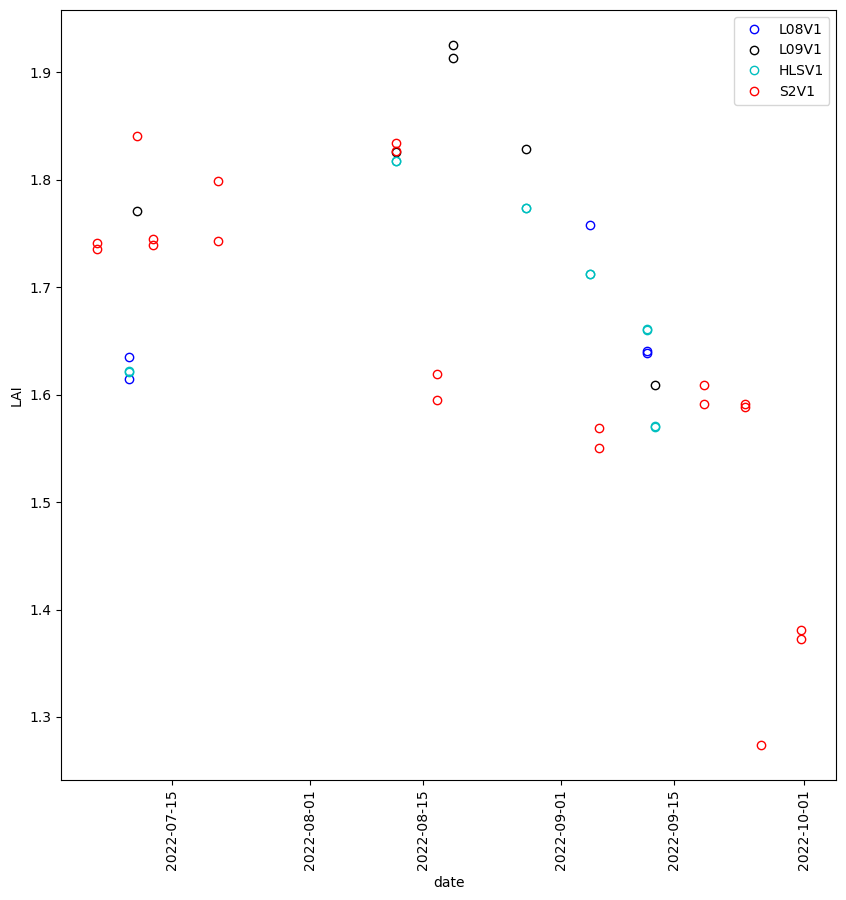

In [9]:
# Choose a site from the sitelist 
siteNum=0
# Select the first feature 
featureNum =0

#Select one sampled pixel from each feature 
pixelNum = 3

# Extract time series of LAI with high quality only
site = sitesDictionaryL08V0[siteList[siteNum]]
df=site[featureNum]['SL2PV0']
df['utc'] =  pd.to_datetime(df['date'],unit='ms')
pixelL08V0=df.loc[(df['longitude']==df.loc[pixelNum].longitude) & (df['latitude']==df.loc[pixelNum].latitude) & (df['QC']==0)]
site=sitesDictionaryL09V0[siteList[siteNum]]
df=site[featureNum]['SL2PV0']
df['utc'] =  pd.to_datetime(df['date'],unit='ms')
pixelL09V0=df.loc[(df['longitude']==df.loc[pixelNum].longitude) & (df['latitude']==df.loc[pixelNum].latitude) & df['QC']==0]
site=sitesDictionaryHLSV0[siteList[siteNum]]
df=site[featureNum]['SL2PV0']
df['utc'] =  pd.to_datetime(df['date'],unit='ms')
pixelHLSV0=df.loc[(df['longitude']==df.loc[pixelNum].longitude) & (df['latitude']==df.loc[pixelNum].latitude) & df['QC']==0]
site=sitesDictionaryS2V0[siteList[siteNum]]
df=site[featureNum]['SL2PV0']
df['utc'] =  pd.to_datetime(df['date'],unit='ms')
pixelS2V0=df.loc[(df['longitude']==df.loc[pixelNum].longitude) & (df['latitude']==df.loc[pixelNum].latitude) & df['QC']==0]


fig,ax = plt.subplots(1,1,figsize=[10,10])
plt.plot(pixelL08V0['utc'],pixelL08V0['estimateLAI'],'ob',markerfacecolor='none', label='L08V1')
plt.plot(pixelL09V0['utc'],pixelL09V0['estimateLAI'],'ok',markerfacecolor='none', label='L09V1')
plt.plot(pixelHLSV0['utc'],pixelHLSV0['estimateLAI'],'oc',markerfacecolor='none', label='HLSV1')
plt.plot(pixelS2V0['utc'],pixelS2V0['estimateLAI'],'or',markerfacecolor='none',label='S2V1')

ax.legend()
ax.set_xlabel('date')
ax.set_ylabel('LAI')
plt.xticks(rotation=90);

In [10]:
print(pixelS2V0)

             date  QC  longitude   latitude  estimateLAI  partition  \
0   1657040895368   0 -85.374162  55.072528     1.740758          8   
1   1657040890816   0 -85.374162  55.072528     1.735982          8   
2   1657472898639   0 -85.374162  55.072528     1.841033          8   
3   1657645097546   0 -85.374162  55.072528     1.739805          8   
4   1657645093585   0 -85.374162  55.072528     1.745176          8   
5   1658336901775   0 -85.374162  55.072528     1.799223          8   
6   1658336897216   0 -85.374162  55.072528     1.743246          8   
7   1660237096653   0 -85.374162  55.072528     1.834181          8   
8   1660237092692   0 -85.374162  55.072528     1.826639          8   
9   1660669105636   0 -85.374162  55.072528     1.594753          8   
10  1660669101678   0 -85.374162  55.072528     1.619709          8   
11  1662397104763   0 -85.374162  55.072528     1.550579          8   
12  1662397100808   0 -85.374162  55.072528     1.569396          8   
13  16